<a href="https://colab.research.google.com/github/Tovict/Hamoye-Stage-B-Quiz/blob/main/Hamoye_Stage_E_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing all necessary librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
import zipfile

In [2]:
#Importing dataset 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df= pd.read_csv('/content/drive/My Drive/Time_series_analysis_and_forecast_DATASET.xls',parse_dates=['FullDate'])
df['FullDate'] = pd.to_datetime(df['FullDate'], errors='coerce')
df.set_index( "FullDate" , inplace= True ) 
                 
df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [4]:
df.isnull().sum()

Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92016 entries, 2010-09-01 00:00:00 to 2021-02-28 23:00:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tmax       92016 non-null  float64
 1   SysLoad    92016 non-null  float64
 2   GasPrice   92016 non-null  float64
 3   ElecPrice  92016 non-null  float64
dtypes: float64(4)
memory usage: 3.5 MB


In [6]:
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [7]:
df.shape

(92016, 4)

In [8]:
#daily resampling
daily_df = df.resample('D').sum()


Text(0, 0.5, 'ElecPrice')

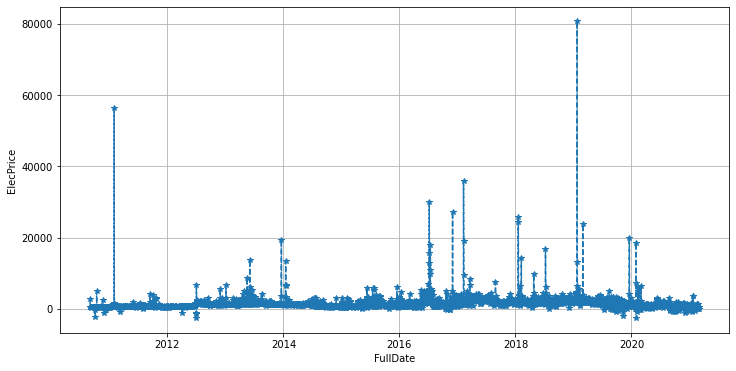

In [9]:
plt.figure(figsize=(12,6))
plt.plot(daily_df.index, daily_df.ElecPrice, '--', marker='*', )
plt.grid()
plt.xlabel('FullDate')
plt.ylabel('ElecPrice')

In [10]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
#Using the Augmented Dicky Fuller test (AD
sysload_ad =adfuller(daily_df.SysLoad)
print( f'ADF Statistic: {sysload_ad[ 0 ]} ' )
print( f'p-value: {sysload_ad[ 1 ]} ' )
print( f'No. of lags used: {sysload_ad[ 2 ]} ' )
print( f'No. of observations used : {sysload_ad[ 3 ]} ' )
print( f'Critical Values:' )
for k, v in sysload_ad[ 4 ].items():
 print( f' {k} : {v} ' )

ADF Statistic: -3.6901589888366457 
p-value: 0.004253725504574117 
No. of lags used: 30 
No. of observations used : 3803 
Critical Values:
 1% : -3.432070672988693 
 5% : -2.8623002987378547 
 10% : -2.567174716967499 


In [12]:
#Using the Augmented Dicky Fuller test (ADF)
gasprice_ad = adfuller(daily_df.GasPrice)
print( f'ADF Statistic: {gasprice_ad[ 0 ]} ' )
print( f'p-value: {gasprice_ad[ 1 ]} ' )
print( f'No. of lags used: {gasprice_ad[ 2 ]} ' )
print( f'No. of observations used : {gasprice_ad[ 3 ]} ' )
print( f'Critical Values:' )
for k, v in gasprice_ad[ 4 ].items():
 print( f' {k} : {v} ' )

ADF Statistic: -2.90276669716518 
p-value: 0.04502721288462542 
No. of lags used: 27 
No. of observations used : 3806 
Critical Values:
 1% : -3.4320693157877544 
 5% : -2.8622996992165364 
 10% : -2.5671743978048323 


In [13]:
#Using the Augmented Dicky Fuller test (ADF)
elecprice_ad = adfuller(daily_df.ElecPrice)
print( f'ADF Statistic: {elecprice_ad[ 0 ]} ' )
print( f'p-value: {elecprice_ad[ 1 ]} ' )
print( f'No. of lags used: {elecprice_ad[ 2 ]} ' )
print( f'No. of observations used : {elecprice_ad[ 3 ]} ' )
print( f'Critical Values:' )
for k, v in elecprice_ad[ 4 ].items():
 print( f' {k} : {v} ' )

ADF Statistic: -8.269053866873803 
p-value: 4.848817773711633e-13 
No. of lags used: 20 
No. of observations used : 3813 
Critical Values:
 1% : -3.432066157296446 
 5% : -2.8622983040036005 
 10% : -2.5671736550459663 


In [14]:
from fbprophet import Prophet
#Reseting the datetime index into a column and assign it as a column in the new dataframe
daily_df.reset_index(inplace=True)
prophet_daily = daily_df[['FullDate','ElecPrice']]

In [15]:
# Renaming the columns
prophet_daily = prophet_daily.rename(columns = {'FullDate': 'ds','ElecPrice': 'y'})
print(prophet_daily.shape)
prophet_daily.head()

(3834, 2)


,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [16]:
train_data = prophet_daily.iloc[:2757,:]

In [17]:
train_data.shape

(2757, 2)

In [18]:
test_data = prophet_daily.iloc[2757:,:]

In [19]:
test_data.shape

(1077, 2)

In [20]:
model = Prophet()
model.fit(train_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
forecast = model.predict(test_data) 
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2691.764386,163.250636,4831.265183,2691.764386,2691.764386,-155.426892,-155.426892,-155.426892,9.749221,9.749221,9.749221,-165.176114,-165.176114,-165.176114,0.0,0.0,0.0,2536.337494
1,2018-03-21,2692.580955,321.082006,5164.908553,2692.580955,2692.580955,-2.925496,-2.925496,-2.925496,159.308129,159.308129,159.308129,-162.233625,-162.233625,-162.233625,0.0,0.0,0.0,2689.655459
2,2018-03-22,2693.397524,369.572039,5398.861463,2693.397524,2693.397524,95.308217,95.308217,95.308217,257.036327,257.036327,257.036327,-161.728110,-161.728110,-161.728110,0.0,0.0,0.0,2788.705741
3,2018-03-23,2694.214093,244.809255,4987.231037,2694.214093,2694.214093,-113.236873,-113.236873,-113.236873,50.257478,50.257478,50.257478,-163.494350,-163.494350,-163.494350,0.0,0.0,0.0,2580.977221
4,2018-03-24,2695.030663,-135.944286,4641.976462,2695.030663,2695.030663,-438.662722,-438.662722,-438.662722,-271.372061,-271.372061,-271.372061,-167.290660,-167.290660,-167.290660,0.0,0.0,0.0,2256.367941


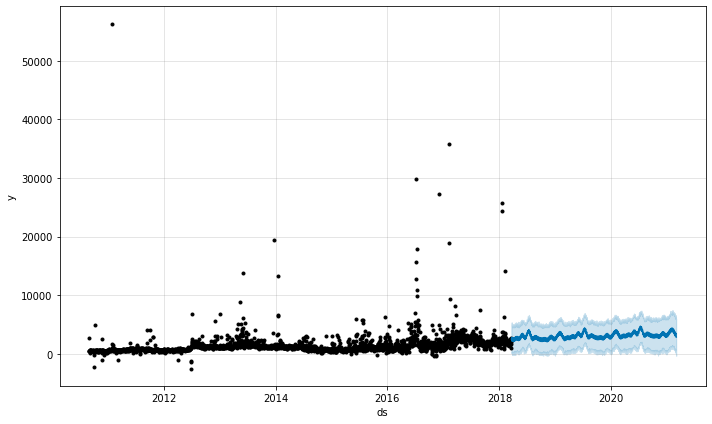

In [22]:
# Plot the model
model.plot(forecast)
plt.show()

In [23]:
from sklearn import metrics
# Calculating Mean Average Percentage Error
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [24]:
MAPE = Metric(test_data['y'],forecast['yhat'])
print(f'the Mean Average Percentage Error ( MAPE) is: {round(MAPE,2)}')

the Mean Average Percentage Error ( MAPE) is: 549.48


In [25]:
# RMSE
RMSE = np.sqrt(metrics.mean_squared_error(test_data['y'],forecast['yhat']))
RMSE
round(RMSE,2)

3218.16

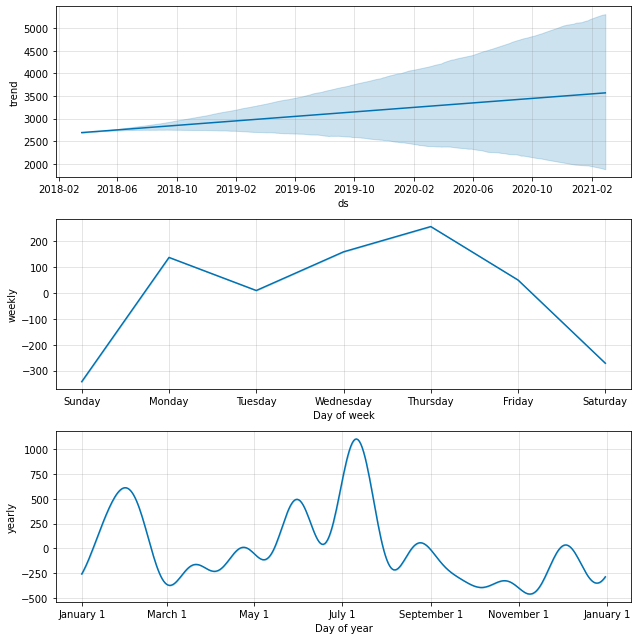

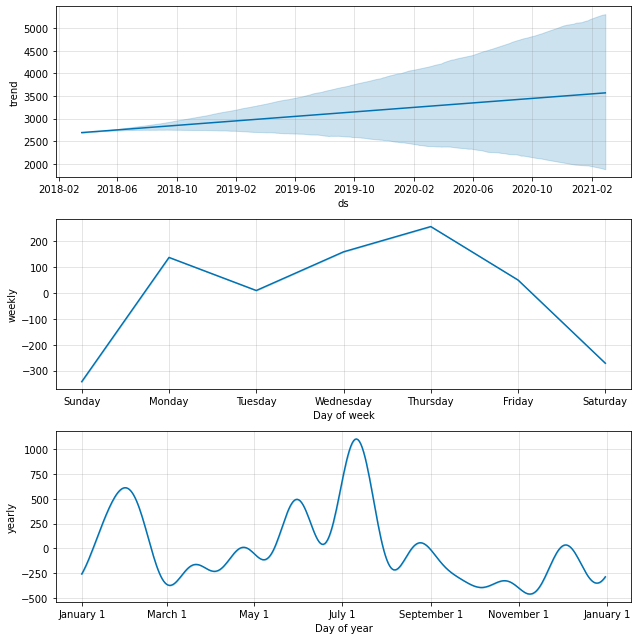

In [26]:
model.plot_components(forecast)

performing multivariate time series analysis


In [27]:
#Reseting the index column of the daily_df
daily_df2 = daily_df
daily_df2.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [28]:
daily_df2.shape

(3834, 5)

In [29]:
#Dropping Tmax as instructed
new_df = daily_df2.drop('Tmax',axis=1)

In [30]:
# Renaming the columns
new_df2 = new_df.rename(columns = {'FullDate':'ds','ElecPrice':'y','SysLoad':'add1',
                                                'GasPrice':'add2'})
new_df2.head()

,ds,add1,add2,y
0,2010-09-01,41565.380,88.56,2751.700
1,2010-09-02,38898.990,88.56,570.810
2,2010-09-03,41665.760,106.80,504.975
3,2010-09-04,35638.085,81.36,502.275
4,2010-09-05,35611.410,106.80,500.555


In [31]:
# Spliting the dateset into train set and test set
train_data2 = new_df2.iloc[:2757,:]
test_data2 = new_df2.iloc[2757:,:]
print(train_data2.shape)
print(test_data2.shape)

(2757, 4)
(1077, 4)


In [32]:
#Building the multivariate prophet model
model_2 = Prophet()
model_2.add_regressor('add1')
model_2.add_regressor('add2')

In [33]:
model_2.fit(train_data2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
prediction = model_2.predict(test_data2)

In [35]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1873.736349,-182.814736,4291.669245,1873.736349,1873.736349,-856.217792,-856.217792,-856.217792,1101.173980,...,-84.272057,-84.272057,-84.272057,-38.232850,-38.232850,-38.232850,0.0,0.0,0.0,1996.187630
1,2018-03-21,1874.447367,-297.844232,4173.356197,1874.447367,1874.447367,-1026.199027,-1026.199027,-1026.199027,1125.642280,...,42.671221,42.671221,42.671221,-28.872483,-28.872483,-28.872483,0.0,0.0,0.0,1987.689358
2,2018-03-22,1875.158384,853.691605,4993.700212,1875.158384,1875.158384,-214.918703,-214.918703,-214.918703,1125.642280,...,145.282901,145.282901,145.282901,-23.766355,-23.766355,-23.766355,0.0,0.0,0.0,2907.398506
3,2018-03-23,1875.869402,543.355590,4796.663483,1875.869402,1875.869402,-274.845778,-274.845778,-274.845778,1058.011195,...,-44.097347,-44.097347,-44.097347,-22.773979,-22.773979,-22.773979,0.0,0.0,0.0,2592.163493
4,2018-03-24,1876.580419,-844.244728,3731.806453,1876.580419,1876.580419,-1076.234889,-1076.234889,-1076.234889,787.662889,...,-117.803753,-117.803753,-117.803753,-25.645550,-25.645550,-25.645550,0.0,0.0,0.0,1444.559116


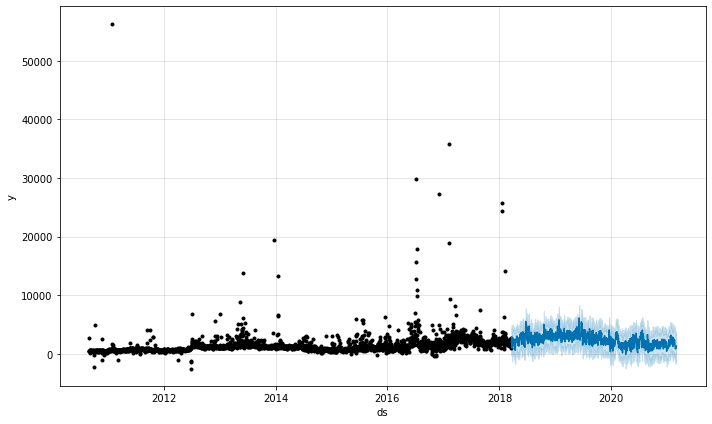

In [36]:
model_2.plot(prediction)
plt.show()

In [37]:
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [38]:
MAPE = Metric(test_data2['y'],prediction['yhat'])
print(f'Mean Average Percentage Error ( MAPE) is:{round(MAPE,2)}')

Mean Average Percentage Error ( MAPE) is:236.66


In [39]:
# RMSE
RMSE = np.sqrt(metrics.mean_squared_error(test_data2['y'],prediction['yhat']))
RMSE
round(RMSE,2)

2712.93

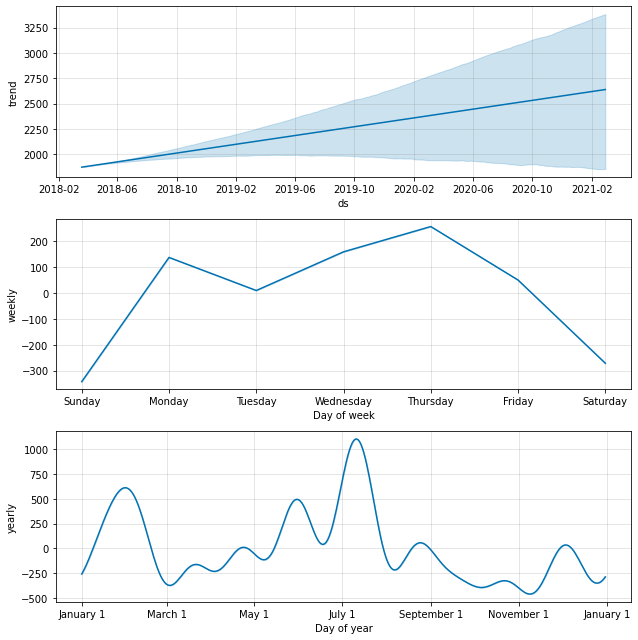

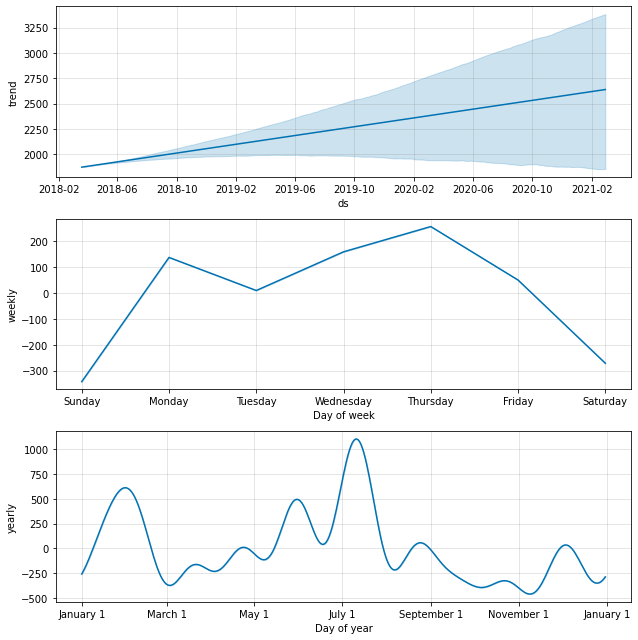

In [40]:
model.plot_components(prediction)

## **Thank you, Hamoye team, for the opportunity; nothing comes easy.**
# I am **grateful**